## Jupyter Notebook: Parsing CSV file and Visualizing Data

In this notebook, we will load a CSV file, convert it to a pandas DataFrame, and then create multiple county specific map visualizations using matplotlib and seborn

In [1]:
pip install pandas matplotlib seaborn


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 1: Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Data

In [3]:
file_path = 'All Property Crime Reported by Population_10-02-2024.csv'
df = pd.read_csv(file_path)

## Step 3: Reshape Data (from wide to long format)

In [4]:
df_long = pd.melt(df, id_vars=['series'], var_name='date', value_name='value')

## Step 4: Convert 'date' to datetime format

In [5]:
df_long['date'] = pd.to_datetime(df_long['date'], format='%m-%Y')

## Step 5: Separate Data by Series

In [6]:
united_states_data = df_long[df_long['series'] == 'United States']
clearance_data = df_long[df_long['series'] == 'United States Clearances']

## Step 6: Plot Data (Time Series)

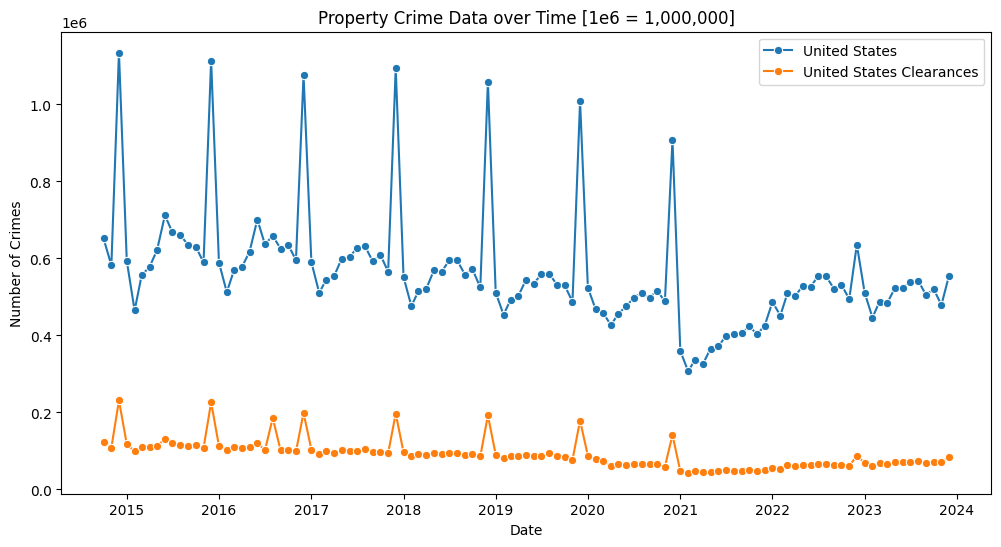

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='value', data=united_states_data, label='United States', marker='o')
sns.lineplot(x='date', y='value', data=clearance_data, label='United States Clearances', marker='o')
plt.title('Property Crime Data over Time [1e6 = 1,000,000]')
plt.ylabel('Number of Crimes')
plt.xlabel('Date')
plt.legend()
plt.show()